In [93]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import  pyplot as plt
%matplotlib inline

# Q1: Code from scratch the k-means clustering algorithm :

First Read the data :

In [94]:
data = pd.read_csv('/content/drive/MyDrive/tut/Kmeans_Pca_data_set/Data.csv')

In [95]:
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
data.shape

(150, 4)

# Original Data before Clustering:

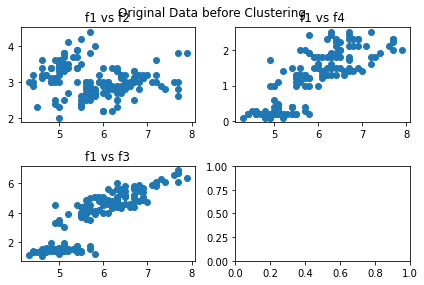

In [97]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Original Data before Clustering')
axs[0, 0].scatter(data.values[:,0],data.values[:,1])
axs[0, 0].set_title("f1 vs f2")
axs[1, 0].scatter(data.values[:,0],data.values[:,2])
axs[1, 0].set_title("f1 vs f3")
axs[0, 1].scatter(data.values[:,0],data.values[:,3])
axs[0, 1].set_title("f1 vs f4")
fig.tight_layout()

In [98]:
class KMeans_Clustering:
  def __init__(self,n_of_clusters,iters = 250):
    self.n_of_clusters = n_of_clusters
    self.iters = iters

  '''
  description:

  This method is to initialize the centroids 
  I initialized it using function in numpy called
  permutation to give random of 150 indexes 
  150 is the number of data I have.
  ----------------------------------------------------- 
  output: 
  
  centroids (ndarray)

  '''

  def init_centroids(self):
    np.random.seed(10)
    random_idx = np.random.permutation(self.X.shape[0])
    selected_index= random_idx[0:self.n_of_clusters]
    return self.X[selected_index]

  '''
  description:

  This method computes the distances between each point and 
  centroids 

  ---------------------------------------------------------
  output: 

  ndarray each column in this array represents the distance 
  of every data point from a specific centroid , for example column 1
  represents the distance from centroid 1 and column 2 represents 
  the distance from centroid 2 and so on

  '''
  def compute_distances(self):
    distances_of_clusters = np.zeros((self.X.shape[0], self.n_of_clusters))
    for i in range(self.n_of_clusters):
      distances_of_clusters[:,i] =np.sqrt(np.sum((self.X - self.centroids[i])**2,axis=1) ) 
    return distances_of_clusters  

  '''
  description:

  This method updates each centroid by calculating the mean value from
  the data that represents its cluster
  ----------------------------------------------------------
  vector represents the updated centroid 
  '''


  def update_centroids(self):
    for i in range(self.n_of_clusters):
      self.centroids[i] = np.mean(self.X[self.clusters == i],axis=0)
      
  '''
  description:

  This method initializes the clusters
  and the centroids first,and then perform
  clustering using the minimum indexes
  (index of the closest point to a given cluster)
  and update the centroids using those new
  clusters , this step will continue
  till the end of the iterations

  input:
  X (ndarray) represents the data

  '''    
  def fit(self, X):
    self.clusters = np.zeros(X.shape[0])
    self.X= X
    self.centroids= self.init_centroids()
    for i in range(self.iters):
        self.clusters = np.argmin(self.compute_distances(), axis =1)
        self.update_centroids()   

  '''
  description:

  This method returns the clusters
  '''      

  def clusters(self):
    return self.clusters 

  '''
  description:
  
  This methods returns the centroids 
  '''
  def centroids(self):
    return self.centroids    

In [99]:
km = KMeans_Clustering(3)

In [100]:
km.fit(data.values)

In [101]:
km.centroids

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [102]:
data["new_clusters"] = km.clusters
data.head()

,f1,f2,f3,f4,new_clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [103]:
data

,f1,f2,f3,f4,new_clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [104]:
km.centroids

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

# First let us take any two features and vistualize the clusters :

F1 VS F2

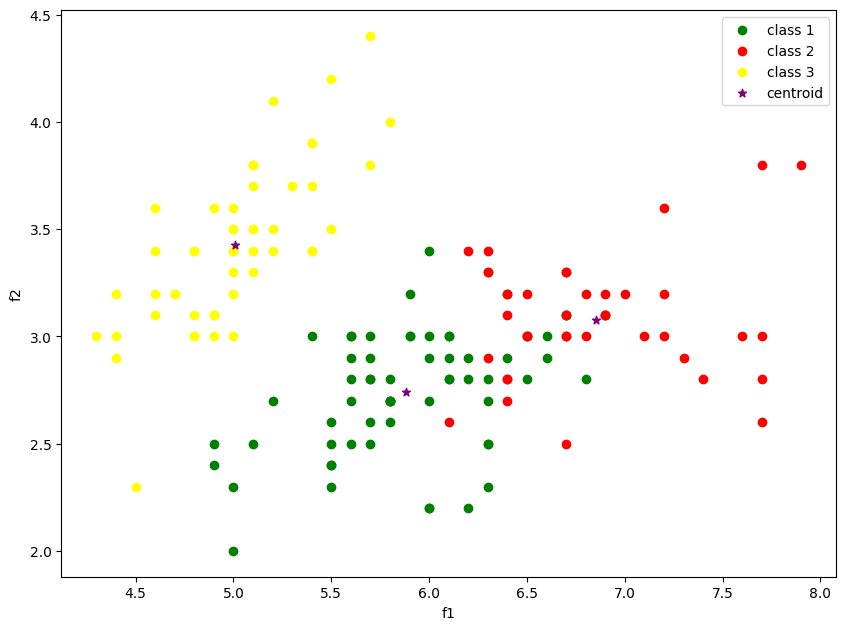

In [105]:
df1 = data[data.new_clusters == 0]
df2 = data[data.new_clusters == 1]
df3 = data[data.new_clusters == 2]
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(df1.f1 ,df1.f2, color = 'green',label = 'class 1')
plt.scatter(df2.f1,df2.f2,color = 'red' , label = 'class 2')
plt.scatter(df3.f1,df3.f2,color = 'yellow' , label = 'class 3')
plt.scatter(km.centroids[:,0],km.centroids[:,1],color = 'purple' , marker='*',label = 'centroid')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()

F1 VS F3

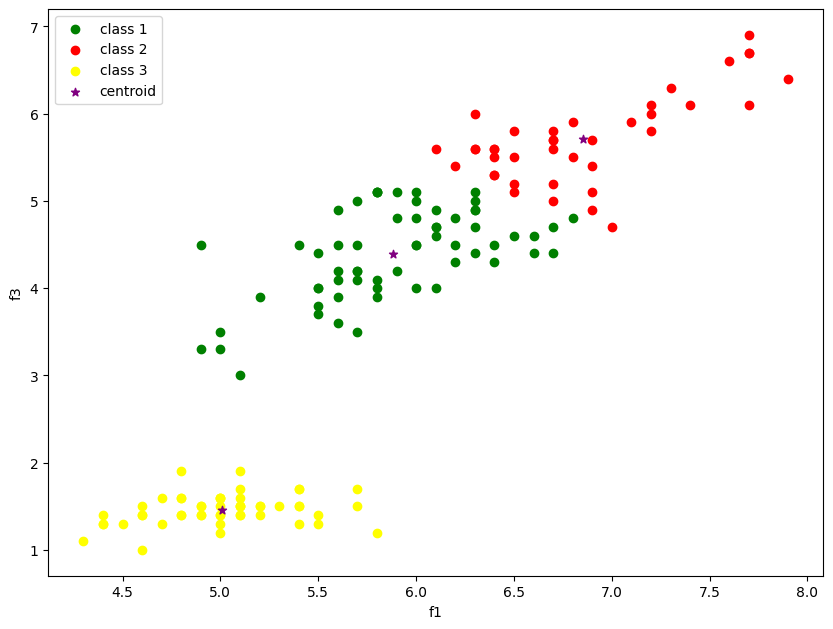

In [106]:
df1 = data[data.new_clusters == 0]
df2 = data[data.new_clusters == 1]
df3 = data[data.new_clusters == 2]
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(df1.f1 ,df1.f3, color = 'green',label = 'class 1')
plt.scatter(df2.f1,df2.f3,color = 'red' , label = 'class 2')
plt.scatter(df3.f1,df3.f3,color = 'yellow' , label = 'class 3')
plt.scatter(km.centroids[:,0],km.centroids[:,2],color = 'purple' , marker='*',label = 'centroid')
plt.xlabel('f1')
plt.ylabel('f3')
plt.legend()

F1 VS F4

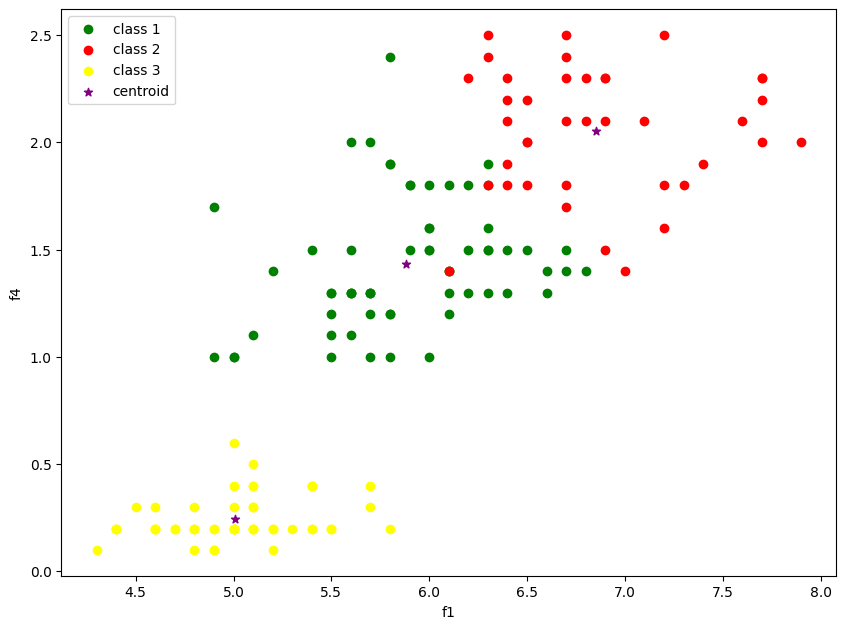

In [107]:
df1 = data[data.new_clusters == 0]
df2 = data[data.new_clusters == 1]
df3 = data[data.new_clusters == 2]
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(df1.f1 ,df1.f4, color = 'green',label = 'class 1')
plt.scatter(df2.f1,df2.f4,color = 'red' , label = 'class 2')
plt.scatter(df3.f1,df3.f4,color = 'yellow' , label = 'class 3')
plt.scatter(km.centroids[:,0],km.centroids[:,3],color = 'purple' , marker='*',label = 'centroid')
plt.xlabel('f1')
plt.ylabel('f4')
plt.legend()

note : we will apply PCA after that to reduce the dimensionality

# Code from scratch the PCA algorithm :

In [108]:
class PCA:
  def __init__(self,n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None
    self.std = None

  def fit(self,X):
    '''
    X : ndarray
    '''
    # mean
    self.mean = np.mean(X,axis=0)
    # standard deviation
    self.std = np.std(X,axis=0)
    # standardaization
    X = (X - self.mean)/self.std
    #covariance matrix
    cov = np.cov(X.T)
    #eigenVectors and eigenValues
    eigenValues , eigenVectors = np.linalg.eig(cov)
    # sort eigenVectors
    eigenVectors = eigenVectors.T
    idx = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[idx]
    # store the first n eigenVectors
    self.components = eigenVectors[0:self.n_components]

  def transform(self,X):
    '''
     project X of the first k pricipale components
     return : ndarray
    '''
    X = (X - self.mean)/self.std
    # project data
    return np.dot(X , self.components.T) 

In [109]:
pca = PCA(2)

In [110]:
data.head()

,f1,f2,f3,f4,new_clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [111]:
pca.fit(data.values[:,:-1])

In [112]:
data_projected = pca.transform(data.values[:,:-1])

In [113]:
print('shape of data = ' , data.values[:,:-1].shape)

shape of data =  (150, 4)


In [114]:
print('shape of transformed data = ' , data_projected.shape)

shape of transformed data =  (150, 2)


# Visualize the result of PCA for 2 components :

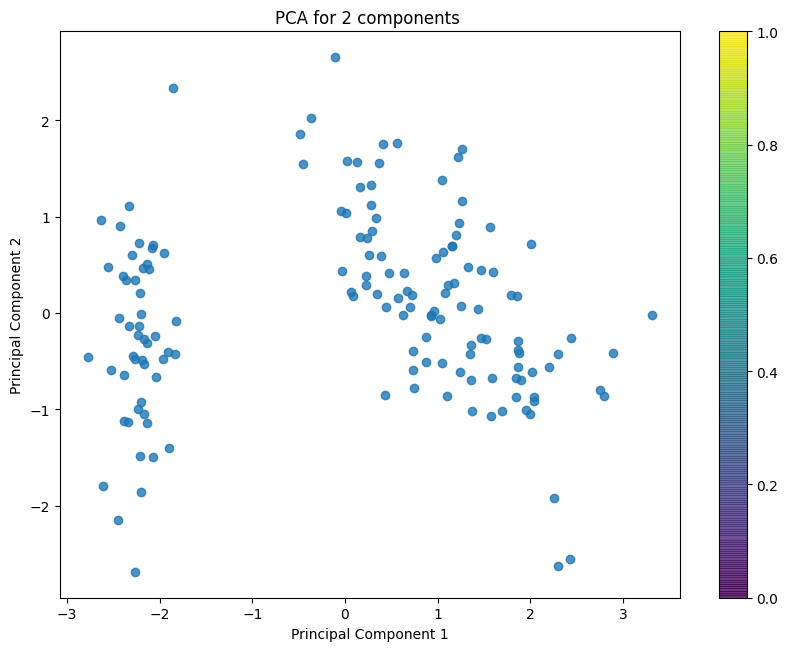

In [115]:
x1 = data_projected[:,0]
x2 = data_projected[:,1]
plt.scatter(x1,x2 , alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for 2 components ')
plt.colorbar()
plt.show()

In [116]:
data_projected

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

# Apply PCA then KMeans Clustering :

To get the most out of PCA , I will try to use it first and then apply KMEANS  Clustering :

In [117]:
km = KMeans_Clustering(3)

In [118]:
km.fit(data_projected)

In [119]:
km.clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [120]:
km.centroids

array([[ 0.42417016,  0.94353874],
       [ 1.63395833, -0.48398172],
       [-2.23223542, -0.34252628]])

In [121]:
data_projected_df = pd.DataFrame(data_projected, columns = ['f1','f2'])

In [122]:
data_projected_df.head()

,f1,f2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835


In [123]:
data_projected_df["new_clusters"] = km.clusters

In [124]:
data_projected_df.head()

,f1,f2,new_clusters
0,-2.264703,-0.480027,2
1,-2.080961,0.674134,2
2,-2.364229,0.341908,2
3,-2.299384,0.597395,2
4,-2.389842,-0.646835,2


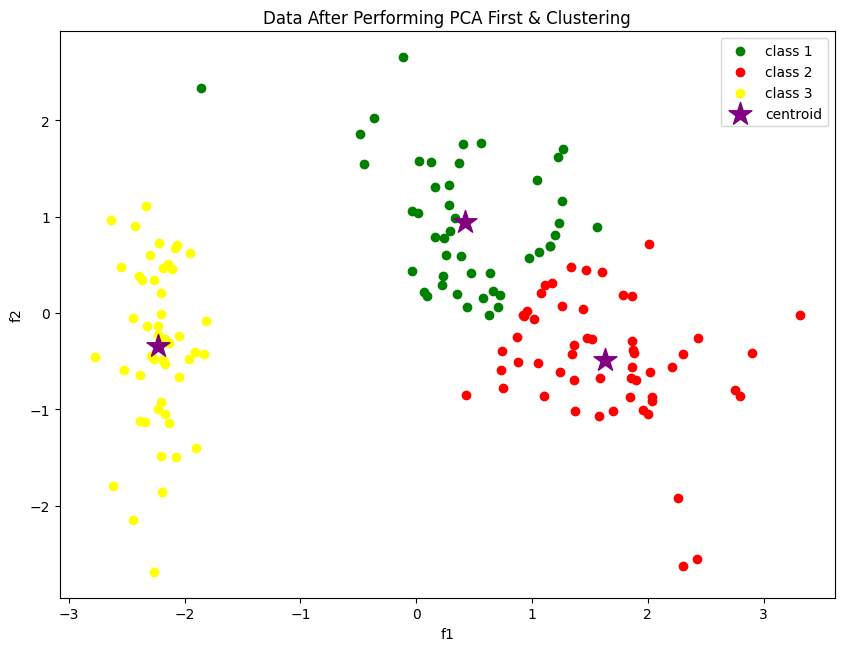

In [127]:
df1 = data_projected_df[data_projected_df.new_clusters == 0]
df2 = data_projected_df[data_projected_df.new_clusters == 1]
df3 = data_projected_df[data_projected_df.new_clusters == 2]
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(df1.f1 ,df1.f2, color = 'green',label = 'class 1')
plt.scatter(df2.f1,df2.f2,color = 'red' , label = 'class 2')
plt.scatter(df3.f1,df3.f2,color = 'yellow' , label = 'class 3')
plt.scatter(km.centroids[:,0],km.centroids[:,1],color = 'purple' , marker='*',label = 'centroid',s=300)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Data After Performing PCA First & Clustering')
plt.legend()

So you will notice that it is very well clustered if you use this approach.